<a href="https://colab.research.google.com/github/iffyaiyan/Lung_Cancer/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lung cancer is a type of cancer that begins in the lungs. Your lungs are two spongy organs in your chest that take in oxygen when you inhale and release carbon dioxide when you exhale.

Lung cancer is the leading cause of cancer deaths worldwide.

People who smoke have the greatest risk of lung cancer, though lung cancer can also occur in people who have never smoked. The risk of lung cancer increases with the length of time and number of cigarettes you've smoked. If you quit smoking, even after smoking for many years, you can significantly reduce your chances of developing lung cancer.



The df dataset contains of the columns:

- Name
- Surname
- Age
- Smoke
- AreaQ
- Alkhol
- Result

In [ ]:
# Installing the dexplot
! pip install dexplot

     |████████████████████████████████| 174kB 4.7MB/s 


In [ ]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for the visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the file
df = pd.read_csv('/lung_cancer_examples.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
# Trying to get the info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
# # Trying to see whether there is any null value or bot in the dataset
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

Its Cool that there is no null value in the dataset



In [ ]:
# Lets describe the dataset

df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


### Lets see the number of unique values in each of the relevant columns

In [ ]:
# the number of unique values in Smokes columns 
print(df['Smokes'].nunique())
df['Smokes'].unique()

16


array([ 3, 20,  0,  4, 15, 12,  2, 18, 10, 25, 22,  5,  8, 13, 30, 34])

From the above output we can see that there are some serious smoker who can smokes upto 34 cigarettes in a day and some don't even smoke

In [ ]:
# the number of unique values in AreaQ columns
print(df['AreaQ'].nunique())
df['AreaQ'].unique()


10


array([ 5,  2,  8, 10,  6,  4,  3,  7,  1,  9])

In [ ]:
# the number of unique values in Alkhol columns
print(df['Alkhol'].nunique())
df['Alkhol'].unique()

9


array([4, 5, 2, 1, 6, 0, 3, 8, 7])

In [ ]:
# the number of unique values in Age columns
print(df['Age'].nunique())
df['Age'].unique()

37


array([35, 27, 30, 28, 68, 34, 58, 22, 45, 52, 33, 18, 25, 39, 42, 19, 62,
       73, 55, 44, 77, 21, 37, 40, 36, 56, 47, 26, 59, 50, 69, 63, 31, 53,
       75, 43, 51])

In [ ]:
# Since Name and Surname are in no way impacting the accuracy of the model so Dropping them

df.drop(['Name', 'Surname'], inplace = True, axis = 'columns')
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


### Let's Visualize the Data

In [ ]:
# Lets see the distribution of Data about the persons who are suffering from 
# Lung Cancer or Not

labels = df['Result'].value_counts()[:].index
values = df['Result'].value_counts()[:].values

colors=['#2678bf', '#98adbf']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                             marker=dict(colors=colors))])

fig.show()

In [ ]:
# Lets visualize the distribution of the person who smokes in 
# terms of the number cigrates smokes

# I will plot here the bar graph for the top 10 smokers

labels = df['Smokes'].value_counts()[:10].index
values = df['Smokes'].value_counts()[:10].values

colors=df['Smokes']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                             marker=dict(colors=colors))])

fig.show()

In [ ]:
# Lets visualize the AreaQ 
labels = df['AreaQ'].value_counts().index
values = df['AreaQ'].value_counts().values

colors=df['AreaQ']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                             marker=dict(colors=colors))])

fig.show()

In [ ]:
 # Lets visualize the Alkhol

labels = df['Alkhol'].value_counts().index
values = df['Alkhol'].value_counts().values

colors=df['Alkhol']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                             marker=dict(colors=colors))])

fig.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


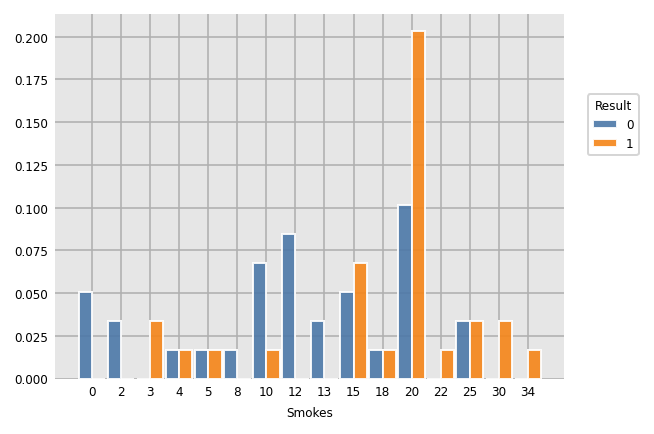

In [ ]:
# Lets visualize the number of cigarattes one Smoke and whether he suffers from 
# Lung Cancer or not

import dexplot as dxp

dxp.count(val='Smokes', data=df, figsize=(4,3), split = 'Result', normalize=True)

From the above plot it is clear that who smokes a lot have more tendency to suffer from the lung cancer 

### Building and Trainig the Model

In [ ]:
# Splitting the data

# Importing the train_test_split
from sklearn.model_selection import train_test_split

X = df.drop(['Result'], axis = 'columns')  # Droping the Result column since we want to predict value of this only
y = df['Result']   # Taking the value which we have to predict

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# Printing the shape of the splitted data

print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (47, 4)
The shape of X_test is (12, 4)
The shape of y_train is (47,)
The shape of y_test is (12,)


Definig the model to calculate the True Positive, True Negative, False Positive and False Negative

In [ ]:
def true_positive(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true positives
    """
    
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true negatives
    """
    
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of false positives
    """
    
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true positives
    """
    
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

### Model 1. Logistic Regression

In [ ]:
# This is our first model 

from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
predict1 = model_log.predict(X_test)

Accuracy Score

Since we know the accuracy score of the model is given by using the formula

Accuracy Score = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
# Defining the  accuracy score model

def accuracy_score(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: accuracy score
    """
    
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    
    accuracy_score = (tp+tn)/(tp+tn+fp+fn)
    return accuracy_score

In [ ]:
# Calculating the accuracy score of the above model

accuracy_score(y_test, predict1)

1.0

From the above model we can see that the model seems to be 100% accurate since the data is small we can cross-check even, but for the larger dataset 100% accuracy is clear indication of model being biased

### Precision

**Precision** attempts to answer the following question:

*What proportion of positive identifications was actually correct?*

Precision is defined as follows:

Precision = tp/(tp+fp)

**Note:** A model that produces no false positives has a precision of 1.0.

In [ ]:
# Definig the precision model

def precision(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: precision score
    """
    
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp/(tp+fp)
    return precision

In [ ]:
# Calculating the precision score of the above model


precision(y_test, predict1)

1.0

The above model has 100% precision score, since the data is small we can cross-check even but for the larger dataset 100% accuracy is clear indication of model being biased

### Recall

**Recall** attempts to answer the following question:

What proportion of actual positives was identified correctly?

Mathematically, recall is defined as follows:

Recall = tp/(tp+fn)

**Note:** A model that produces no false negatives has a recall of 1.0.

In [ ]:
# Defining the recall model

def recall(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: recall score
    """
    
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp/(tp+fn)
    return recall

In [ ]:
# Calculating the recall score of the above model


recall(y_test, predict1)

1.0

### F1 Score

The **F1 Score** is the 2*((precision*recall)/(precision+recall)). It is also called the **F Score or the F Measure**. Put another way, the F1 score conveys the balance between the precision and the recall.

Both precision and recall range from 0 to 1 and a value closer to 1 is better

F1 = 2PR/(P+R)

In [ ]:
# Defining the f1 score model

def f1(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: f1 score
    """
    
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    score = 2*p*r/(p+r)
    
    return score

In [ ]:
# Calculating the f1 score 

f1(y_test, predict1)

1.0

An **ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

**TPR = TP/TP+FN**

False Positive Rate (FPR) is defined as follows:

**FPR = FP/FP+TN**

In [ ]:
# Calculating the roc_auc_score

from sklearn import metrics
metrics.roc_auc_score(y_test, predict1)

1.0

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


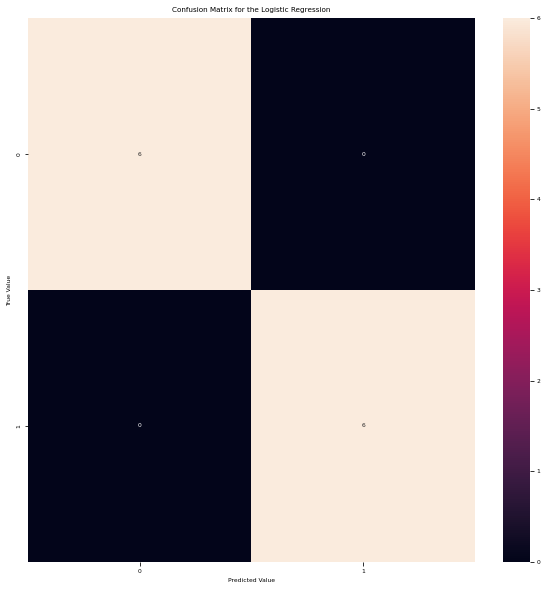

In [ ]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict1)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Logistic Regression')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

### Model 2. Decision Tree Classification

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_features=None, random_state=None, max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
                                   presort='deprecated', ccp_alpha=0.0)
model_dtc.fit(X_train, y_train)
predict2 = model_dtc.predict(X_test)

In [ ]:
# Calculating the accuracy score of the above model

accuracy_score(y_test, predict2)

0.9166666666666666

In [ ]:
# Calculating the precision score of the above model


precision(y_test, predict2)

0.8571428571428571

In [ ]:
# Calculating the recall score of the above model


recall(y_test, predict2)

1.0

In [ ]:
# Calculating the f1 score 

f1(y_test, predict2)

0.923076923076923

In [ ]:
# Calculating the roc_auc_score

from sklearn import metrics
metrics.roc_auc_score(y_test, predict2)

0.9166666666666667

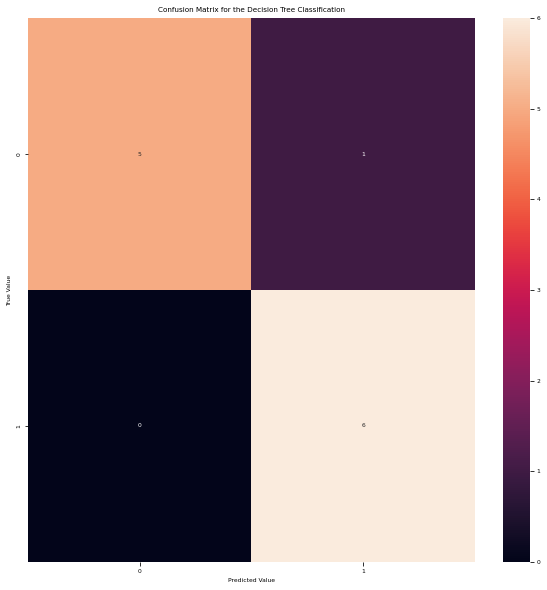

In [ ]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict2)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Decision Tree Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

### Model 3. Random Forest Classification

It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
model_rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                   bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                                   verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
model_rfc.fit(X_train, y_train)
predict3 = model_rfc.predict(X_test)

In [ ]:
# Calculating the accuracy score of the above model

accuracy_score(y_test, predict3)

0.9166666666666666

In [ ]:
# Calculating the precision score of the above model


precision(y_test, predict3)

0.8571428571428571

In [ ]:
# Calculating the recall score of the above model


recall(y_test, predict3)

1.0

In [ ]:
# Calculating the f1 score 

f1(y_test, predict3)

0.923076923076923

In [ ]:
# Calculating the roc_auc_score

from sklearn import metrics
metrics.roc_auc_score(y_test, predict3)

0.9166666666666667

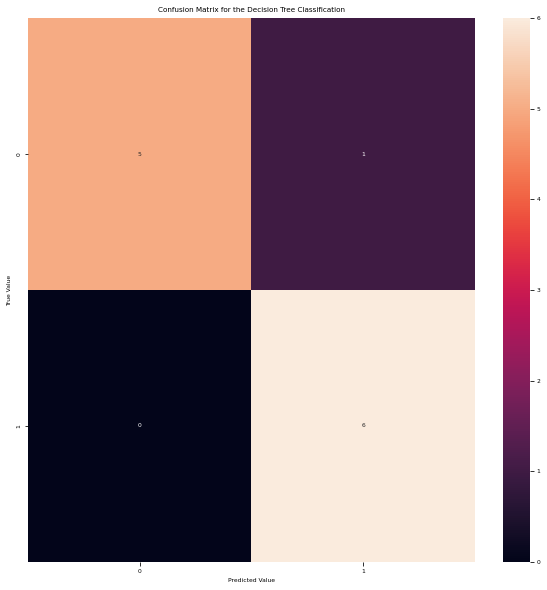

In [ ]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict3)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Decision Tree Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

### Model 4. SVM

An **SVM** model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel

model_svm.fit(X_train, y_train)
predict4 = model_svm.predict(X_test)

In [ ]:
# Calculating the accuracy score of the above model

accuracy_score(y_test, predict4)

0.9166666666666666

In [ ]:
# Calculating the precision score of the above model


precision(y_test, predict4)

1.0

In [ ]:
# Calculating the recall score of the above model


recall(y_test, predict4)

0.8333333333333334

In [ ]:
# Calculating the f1 score 

f1(y_test, predict4)

0.9090909090909091

In [ ]:
# Calculating the roc_auc_score

from sklearn import metrics
metrics.roc_auc_score(y_test, predict4)

0.9166666666666667

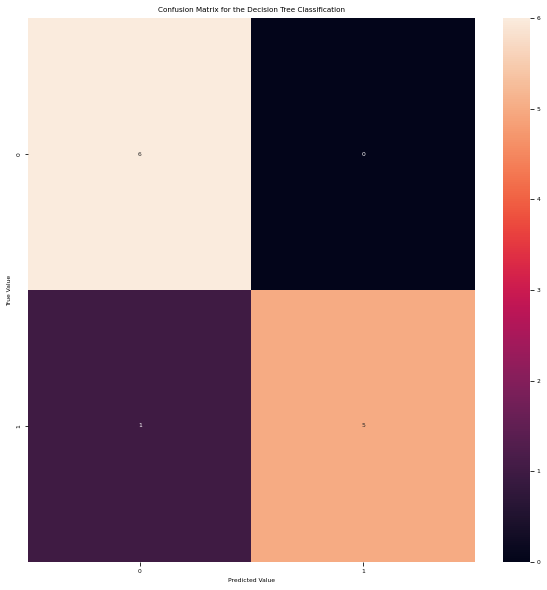

In [ ]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict4)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Decision Tree Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

### Model 5. Naive Bayes

**Naive Bayes** is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value.

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_NB = GaussianNB()

# Train the model using the training sets
model_NB.fit(X_train, y_train)
predict5 = model_NB.predict(X_test)

In [ ]:
# Calculating the accuracy score of the above model

accuracy_score(y_test, predict5)

1.0

In [ ]:
# Calculating the prec5sion score of the above model


precision(y_test, predict5)

1.0

In [ ]:
# Calculating the recall score of the above model


recall(y_test, predict5)

1.0

In [ ]:
# Calculating the f1 score 

f1(y_test, predict5)

1.0

In [ ]:
# Calculating the roc_auc_score

from sklearn import metrics
metrics.roc_auc_score(y_test, predict5)

1.0

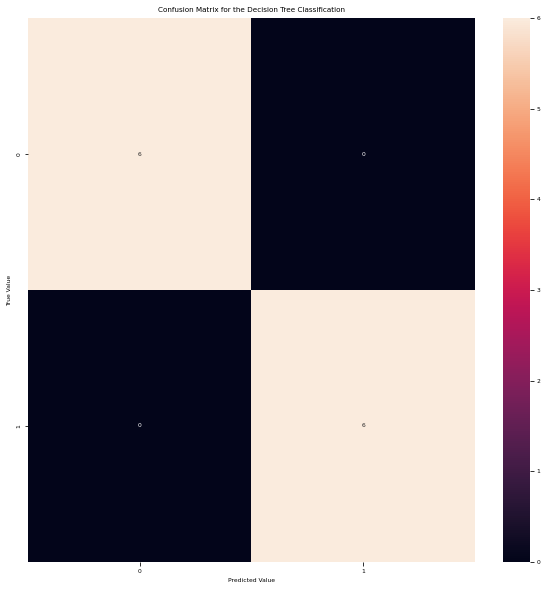

In [ ]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict5)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Decision Tree Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()


The above analysis gave us a proper understaning about the dataset aloing with the vital factor causing lung-cancer and how the trend of lung cancer varies in chain smoker and the non-chain-smokers